# IS 4487 Lab 7

## Outline

Begin where you left on in Lab 6 with the *SuperStore Retail Orders* dataset

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab7_retailer_eda2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/gdrive/MyDrive/Colab Notebooks/superstore_retail_orders (2).csv')

print (df)


Mounted at /content/gdrive
       order_id  order_date order_year_month     customer_name  \
0         51188  2021-07-01          2021-07     Audrey Blanco   
1         51187  2021-07-01          2021-07       Isaac Allen   
2         51199  2021-07-02          2021-07        Ian Morgan   
3         51241  2021-07-04          2021-07        Alexa Bell   
4         51297  2021-07-08          2021-07        Casey Diaz   
...         ...         ...              ...               ...   
56040     74084  2022-06-29          2022-06        Ian Rogers   
56041     74062  2022-06-29          2022-06   Marcus Anderson   
56042     74065  2022-06-29          2022-06  Nathaniel Howard   
56043     74038  2022-06-29          2022-06        Robin Sanz   
56044     74110  2022-06-30          2022-06   Mallory Jimenez   

                    city             state_province  quantity  \
0      North Cherylmouth  NEW HAMPSHIRE                   3.0   
1             Traceyland  WEST VIRGINIA           

Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values
- Identify at least one variable with a missing value that can be imputed.   Fill in those empty values.
- Add a "total_amount" variable based on the quantity and price

In [ ]:
#data preparation

In [8]:
# Convert non-numeric columns with numerical data into the correct datatype
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['order_year_month'] = pd.to_datetime(df['order_year_month'], errors='coerce')
df['quantity'] = pd.to_numeric(df['quantity'], errors='coerce')

In [ ]:
#outlier check and cleanup

In [9]:
# Check for errors in date conversion
print(df[df['order_date'].isnull()]['order_date'])

736     NaT
2245    NaT
2770    NaT
3223    NaT
3720    NaT
         ..
53939   NaT
54191   NaT
54198   NaT
54199   NaT
56039   NaT
Name: order_date, Length: 87, dtype: datetime64[ns]


In [10]:

# Remove rows with invalid date values
df = df.dropna(subset=['order_date'])

In [11]:
# Convert appropriate character variables into factors (assuming product_line and state_province are categorical)
df['product_line'] = df['product_line'].astype('category')
df['state_province'] = df['state_province'].astype('category')

In [12]:
# Remove rows with empty (NULL) values
df = df.dropna()

In [13]:
# Identify a variable with missing values and impute them (let's assume 'quantity' has some missing values)
# For simplicity, we'll impute missing values with the mean of the column
df['quantity'].fillna(df['quantity'].mean(), inplace=True)

In [14]:
df['total_amount'] = df['quantity'] * df['product_price']


In [15]:
# Describe or profile the dataframe
print(df.describe())
print(df.info())

           order_id       quantity  product_price  total_amount
count  55445.000000   55445.000000   55445.000000  5.544500e+04
mean   61681.191108       3.366976    6231.201863  1.196159e+04
std     7502.377958     424.779375   35893.810077  7.499839e+04
min    45079.000000       1.000000       2.290000  2.290000e+00
25%    55671.000000       1.000000       7.950000  1.497000e+01
50%    61895.000000       1.000000     475.600000  4.756000e+02
75%    68096.000000       2.000000     914.620000  1.219260e+03
max    74147.000000  100000.000000  235481.000000  2.024994e+06
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55445 entries, 0 to 56044
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          55445 non-null  int64         
 1   order_date        55445 non-null  datetime64[ns]
 2   order_year_month  55445 non-null  datetime64[ns]
 3   customer_name     55445 non-null  object

In [ ]:
#impute values

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable called "complete_customer_info".   Use "1" for True and "2" for False.  All customer fields must be valid and not empty before this variable is True.
- Create a bar chart showing the count of customers with complete informaiton versus incomplete information

In [16]:
#create variable

In [17]:
# Check if all customer fields are valid and not empty
df['complete_customer_info'] = (df['customer_name'].notnull()) & \
                                (df['city'].notnull()) & \
                                (df['state_province'].notnull())


In [18]:
# Convert True/False to 1/0
df['complete_customer_info'] = df['complete_customer_info'].astype(int)

In [ ]:
#create chart

In [20]:

# Count the number of customers with complete and incomplete information
info_counts = df['complete_customer_info'].value_counts()


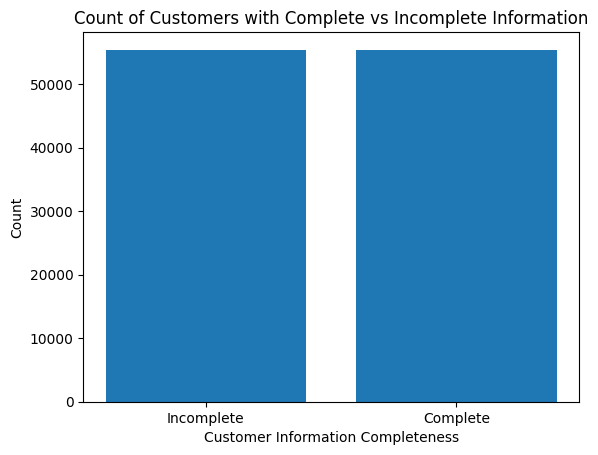

In [23]:
# Plot the bar chart
plt.bar(['Incomplete', 'Complete'], info_counts)
plt.xlabel('Customer Information Completeness')
plt.ylabel('Count')
plt.title('Count of Customers with Complete vs Incomplete Information')
plt.show()

In [24]:
# Check the counts of complete and incomplete customer information
print("Counts of complete and incomplete customer information:")
print(info_counts)

Counts of complete and incomplete customer information:
1    55445
Name: complete_customer_info, dtype: int64


## Prepare Data - Continued

➡️ Assignment Tasks
- Create seasonal buckets for Winter, Sprint, Summer, Fall
- Create a chart to show revenue by season
- Create a chart to show revenue by year

In [ ]:
#seasonality

In [27]:
# Create seasonal buckets
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

In [29]:
# Extract month from order_date
df['order_month'] = df['order_date'].dt.month

In [30]:

# Create season column
df['season'] = df['order_month'].apply(get_season)

In [31]:
# Calculate revenue for each season
seasonal_revenue = df.groupby('season')['total_amount'].sum()

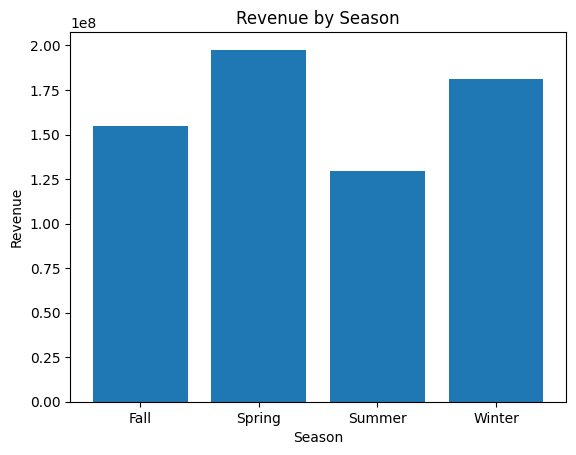

In [32]:
# Plot revenue by season
plt.bar(seasonal_revenue.index, seasonal_revenue.values)
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Revenue by Season')
plt.show()

In [33]:
# Extract year from order_date
df['order_year'] = df['order_date'].dt.year

In [34]:
# Calculate revenue for each year
yearly_revenue = df.groupby('order_year')['total_amount'].sum()

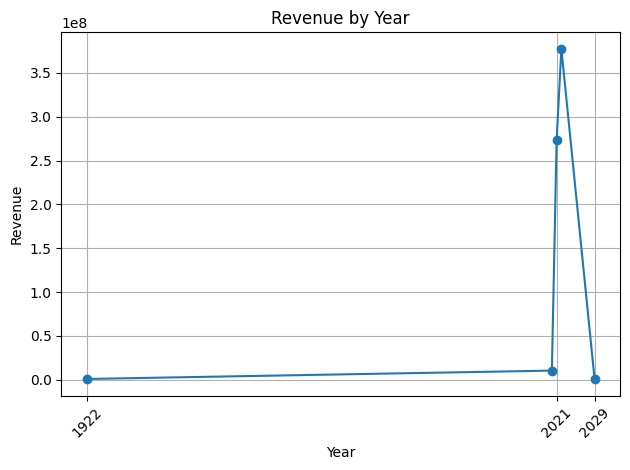

In [43]:
# Plot revenue by year with spaced out x-axis labels (display every other year)
plt.plot(yearly_revenue.index, yearly_revenue.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue by Year')
plt.xticks(yearly_revenue.index[::2], rotation=45, fontsize=10)  # Display every other year
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#revenue over time

## Prepare Data - Continued

➡️ Assignment Tasks
- Create a variable that will group product lines into "Outdoor" versus "Indoor" products.
- Create a plot to show the correlation between outdoor/indoor versus season  

In [ ]:
#indoor/outdoor variable

In [44]:
# Create a variable to group product lines into "Outdoor" versus "Indoor"
def categorize_product_line(product_line):
    outdoor_products = ['Outdoor', 'Camping', 'Hiking', 'Fishing', 'Sports']
    if product_line in outdoor_products:
        return 'Outdoor'
    else:
        return 'Indoor'

In [45]:
# Apply the categorization function to create a new column
df['product_category'] = df['product_line'].apply(categorize_product_line)


In [46]:

# Check the counts of each product category
print(df['product_category'].value_counts())

Indoor    55445
Name: product_category, dtype: int64


In [47]:
# Create a cross-tabulation between season and product category
season_product_ct = pd.crosstab(df['season'], df['product_category'])


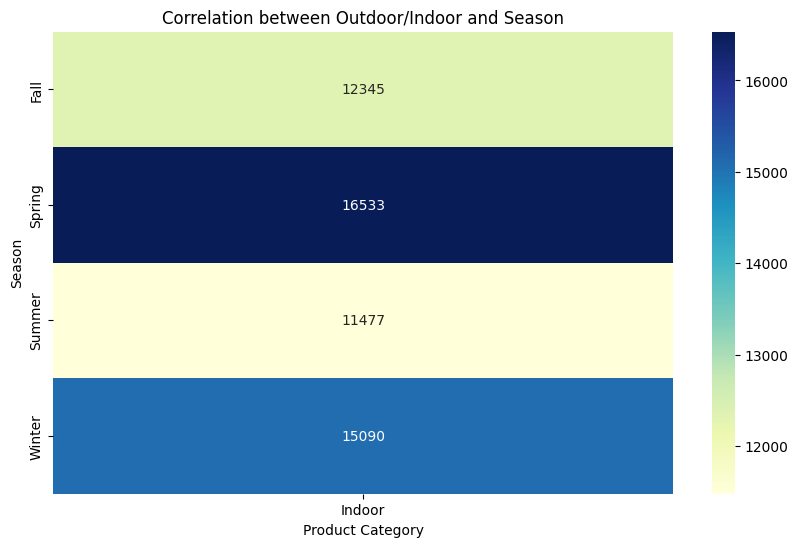

In [48]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(season_product_ct, annot=True, cmap="YlGnBu", fmt="d")
plt.xlabel('Product Category')
plt.ylabel('Season')
plt.title('Correlation between Outdoor/Indoor and Season')
plt.show()
